In [2]:
import numpy as np
import scipy.io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from argparse import Namespace
from sklearn.linear_model import LogisticRegression
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingClassifier
'''Definition'''

MAGNITUDE = True
SEED = 0
np.random.seed(SEED)
pca_2d = PCA(n_components=2)
scaler = StandardScaler() 
def load_data(data_dir, return_mag=True):
    data = scipy.io.loadmat(data_dir)
    d, t,r = data['data'], data['target'],data['gases_ratios']
    r = r[:, -1].reshape(-1, 1)
    if return_mag:
        d = np.abs(d)
    else:
        dreal = np.real(d)
        dimg = np.imag(d)
        d = np.concatenate([dreal, dimg], axis=1)
    return d.astype(np.float32), t.astype(np.float32),r.astype(np.float32)




Loading the training data and the test data !

In [26]:
import numpy as np
DATA_DIR_1 = f"SNR_VS_ACC/SNR_{1}.mat"
DATA_DIR_2 = f"SNR_VS_ACC/SNR_{10}.mat"
DATA_DIR_3 = f"SNR_VS_ACC/SNR_{20}.mat"
DATA_DIR_4 = f"SNR_VS_ACC/SNR_{30}.mat"
DATA_DIR_5 = f"SNR_VS_ACC/SNR_{40}.mat"
DATA_DIR_6 = f"SNR_VS_ACC/SNR_{50}.mat"
DATA_DIR_7 = f"SNR_VS_ACC/SNR_{60}.mat"

DATA_DIR_8 = f"SNR_VS_ACC/SNR_{70}.mat"
DATA_DIR_9 = f"SNR_VS_ACC/SNR_{80}.mat"
DATA_DIR_10 = f"SNR_VS_ACC/SNR_{90}.mat"
DATA_DIR_11 = f"SNR_VS_ACC/SNR_{100}.mat"

f, l,r = load_data(DATA_DIR_11, MAGNITUDE)
X_train = f
y_train = l
f2,l2,r2 = load_data(DATA_DIR_10, MAGNITUDE)
X_train = np.concatenate((X_train,f2),axis=0)
y_train = np.concatenate((y_train, l2), axis=0)
f3,l3,r3 = load_data(DATA_DIR_9, MAGNITUDE)
X_train = np.concatenate((X_train, f3), axis=0)
y_train = np.concatenate((y_train, l3), axis=0)
# f4,l4,r4 = load_data(DATA_DIR_4, MAGNITUDE)
# X_train = np.concatenate((X_train, f4), axis=0)
# y_train = np.concatenate((y_train, l4), axis=0)
# f5,l5,r5 = load_data(DATA_DIR_5, MAGNITUDE)
# X_train = np.concatenate((X_train, f5), axis=0)
# y_train = np.concatenate((y_train, l5), axis=0)
# f6,l6,r6 = load_data(DATA_DIR_6, MAGNITUDE)
# X_train = np.concatenate((X_train, f6), axis=0)
# y_train = np.concatenate((y_train, l6), axis=0)
# f7,l7,r7 = load_data(DATA_DIR_7, MAGNITUDE)
# X_train = np.concatenate((X_train, f7), axis=0)
# y_train = np.concatenate((y_train, l7), axis=0)
# f8,l8,r8 = load_data(DATA_DIR_8, MAGNITUDE)
# X_train = np.concatenate((X_train, f8), axis=0)
# y_train = np.concatenate((y_train, l8), axis=0)
# f9,l9,r9 = load_data(DATA_DIR_9, MAGNITUDE)
# X_train = np.concatenate((X_train, f9), axis=0)
# y_train = np.concatenate((y_train, l9), axis=0)
# f10,l10,r10 = load_data(DATA_DIR_10, MAGNITUDE)
# X_train = np.concatenate((X_train, f10), axis=0)
# y_train = np.concatenate((y_train, l10), axis=0)
# f11,l11,r11 = load_data(DATA_DIR_11, MAGNITUDE)
# X_train = np.concatenate((X_train, f11), axis=0)
# y_train = np.concatenate((y_train, l11), axis=0).squeeze()
print(X_train.shape)
print(y_train.shape)

(300, 256)
(300, 1)


In [27]:
import numpy as np
DATA_DIR_1 = f"SNR_VS_ACC/SNR_{1}.mat"
DATA_DIR_2 = f"SNR_VS_ACC/SNR_{10}.mat"
DATA_DIR_3 = f"SNR_VS_ACC/SNR_{20}.mat"
DATA_DIR_4 = f"SNR_VS_ACC/SNR_{30}.mat"
DATA_DIR_5 = f"SNR_VS_ACC/SNR_{40}.mat"
DATA_DIR_6 = f"SNR_VS_ACC/SNR_{50}.mat"
DATA_DIR_7 = f"SNR_VS_ACC/SNR_{60}.mat"

DATA_DIR_8 = f"SNR_VS_ACC/SNR_{70}.mat"
DATA_DIR_9 = f"SNR_VS_ACC/SNR_{80}.mat"
DATA_DIR_10 = f"SNR_VS_ACC/SNR_{90}.mat"
DATA_DIR_11 = f"SNR_VS_ACC/SNR_{100}.mat"

f, l,r = load_data(DATA_DIR_1, MAGNITUDE)
X_test = [f]
y_test =[l]
f2,l2,r2 = load_data(DATA_DIR_2, MAGNITUDE)
X_test.append(f2)
y_test.append(l2)
f3,l3,r3 = load_data(DATA_DIR_3, MAGNITUDE)
X_test.append(f3)
y_test.append(l3)
f4,l4,r4 = load_data(DATA_DIR_4, MAGNITUDE)
X_test.append(f4)
y_test.append(l4)
f5,l5,r5 = load_data(DATA_DIR_5, MAGNITUDE)
X_test.append(f5)
y_test.append(l5)
f6,l6,r6 = load_data(DATA_DIR_6, MAGNITUDE)
X_test.append(f6)
y_test.append(l6)
f7,l7,r7 = load_data(DATA_DIR_7, MAGNITUDE)
X_test.append(f7)
y_test.append(l7)
f8,l8,r8 = load_data(DATA_DIR_8, MAGNITUDE)
X_test.append(f8)
y_test.append(l8)
f9,l9,r9 = load_data(DATA_DIR_9, MAGNITUDE)
X_test.append(f9)
y_test.append(l9)
f10,l10,r10 = load_data(DATA_DIR_10, MAGNITUDE)
X_test.append(f10)
y_test.append(l10)
f11,l11,r11 = load_data(DATA_DIR_11, MAGNITUDE)
X_test.append(f11)
y_test.append(l11)
X_test = np.array(X_test)
y_test = np.array(y_test)
print(X_test.shape)
print(y_test.shape)

(11, 100, 256)
(11, 100, 1)


In [28]:
X_train_sc = scaler.fit_transform(X_train)
X_train_sc_pca_2 = pca_2d.fit_transform(X_train_sc)
LOG_2 = LogisticRegression()
LOG_2.fit(X_train_sc_pca_2, y_train) 

c:\Python311\Lib\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

11


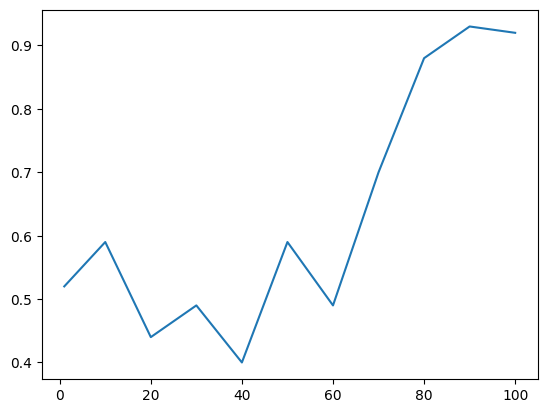

In [29]:

test_j_res = []
for j,k in zip(X_test,y_test):
    k = k.squeeze()
    X_test_sc = scaler.transform(j)
    X_test_sc_pca_2 = pca_2d.transform(X_test_sc)
    acc_test_LOG_2 = accuracy_score(k, LOG_2.predict(X_test_sc_pca_2))
    test_j_res.append(acc_test_LOG_2)
print(len(test_j_res))
plt.plot([1,10,20,30,40,50,60,70,80,90,100],test_j_res)

Actual Drawings!

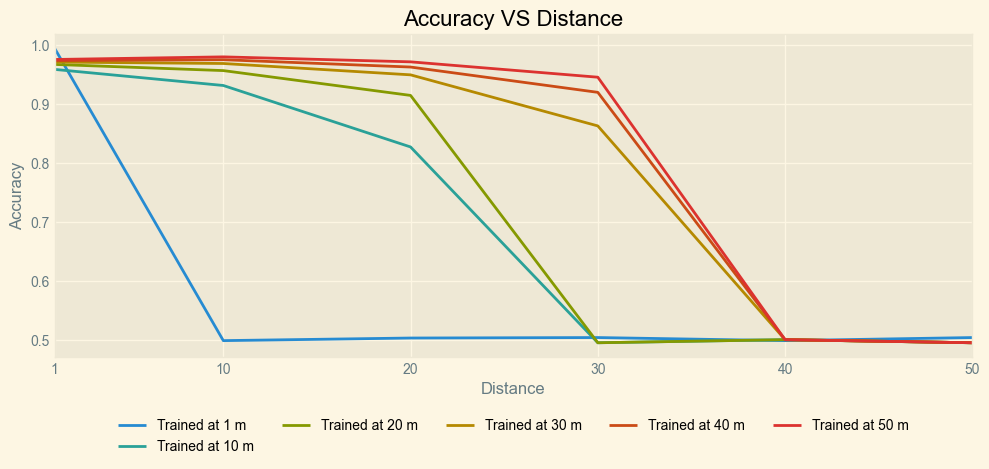

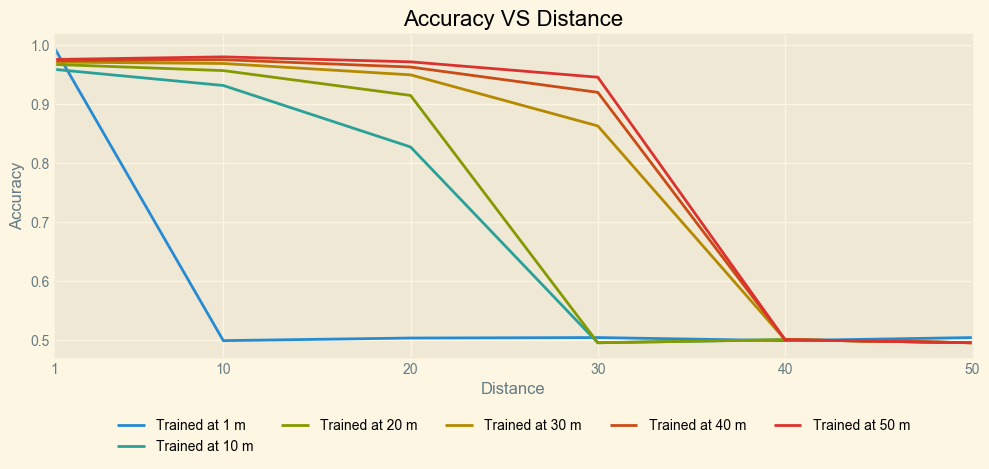

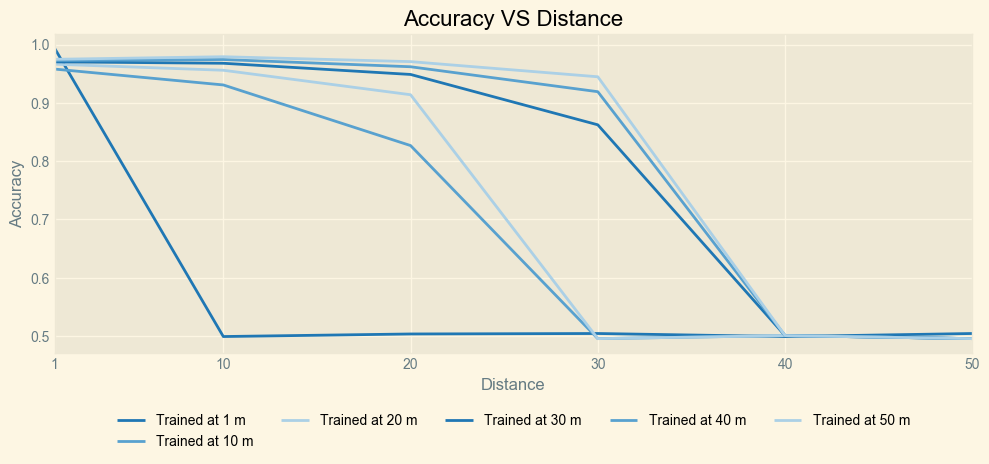

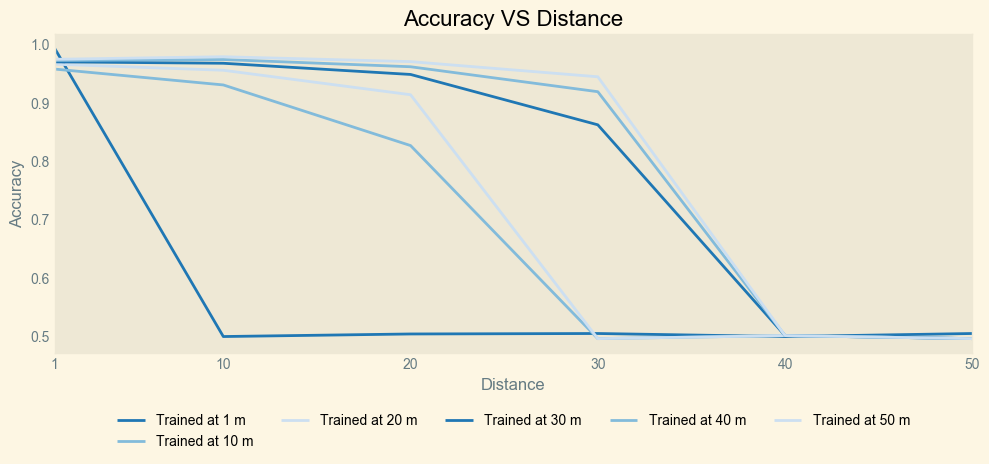

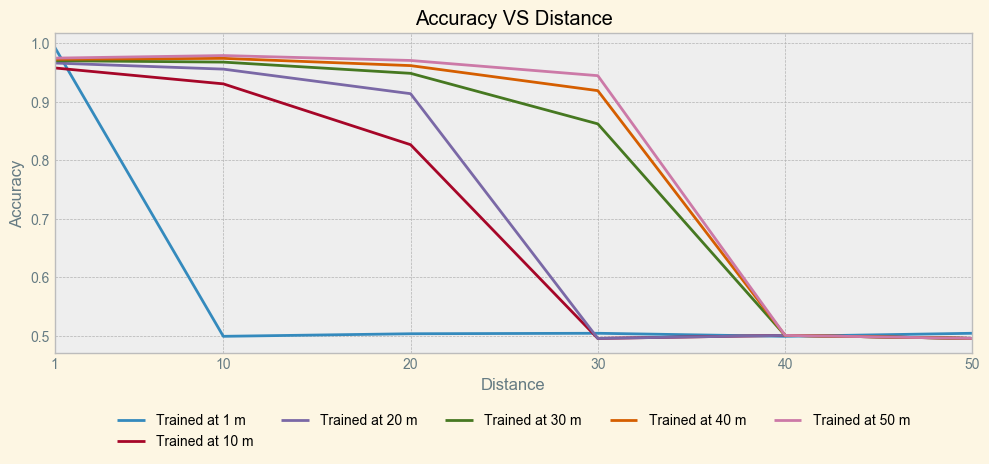

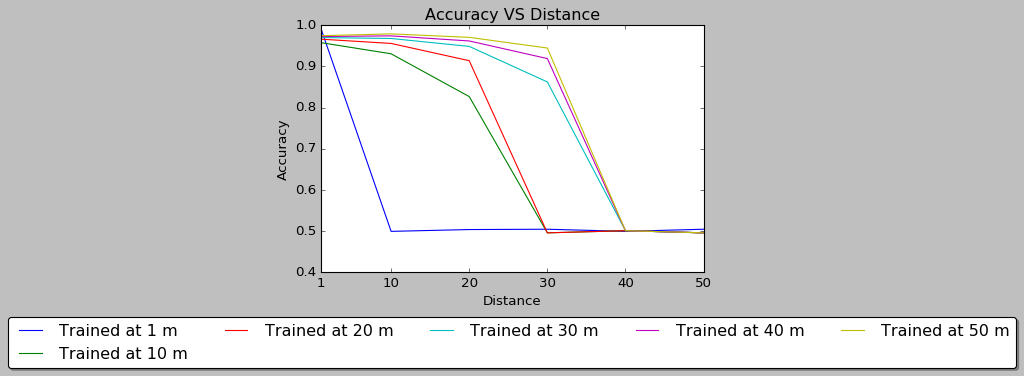

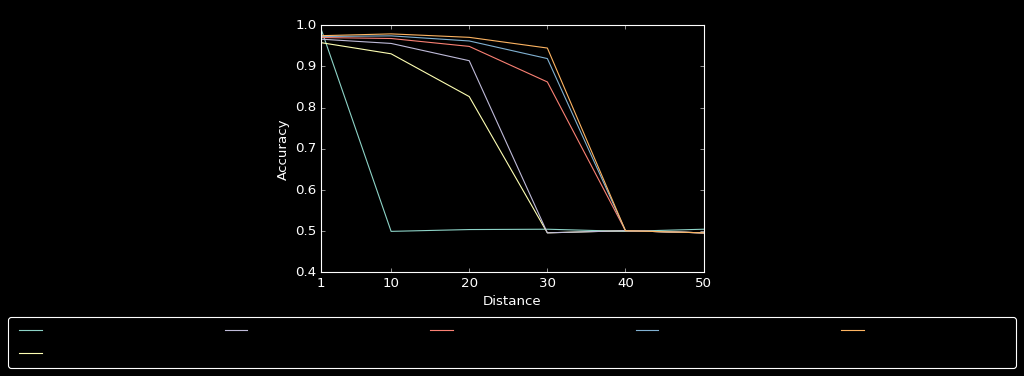

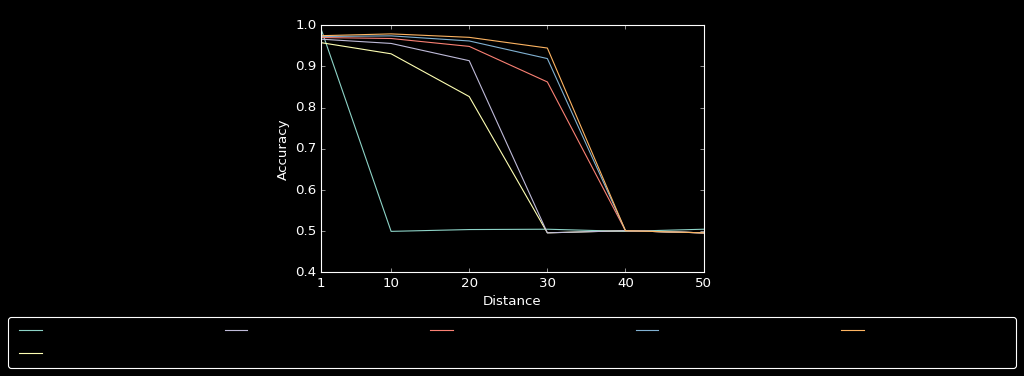

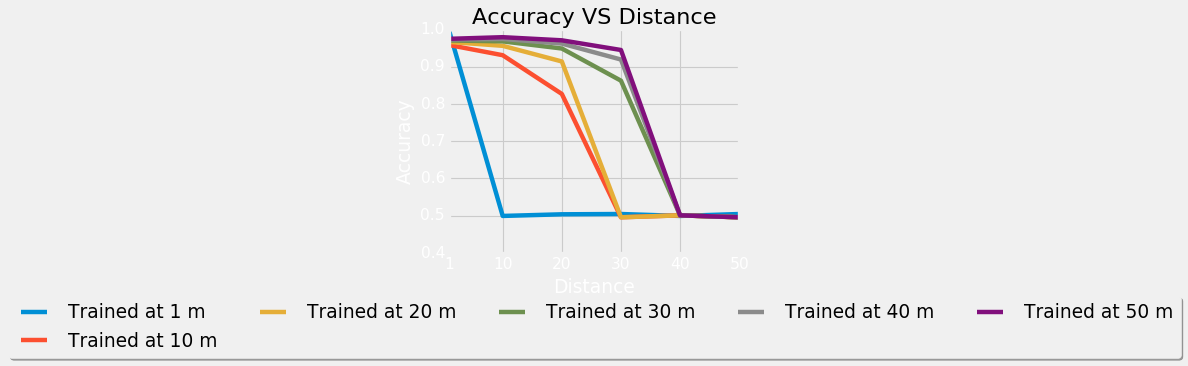

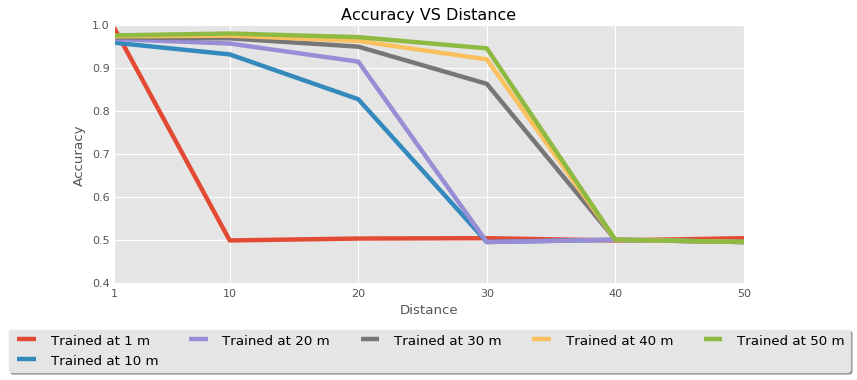

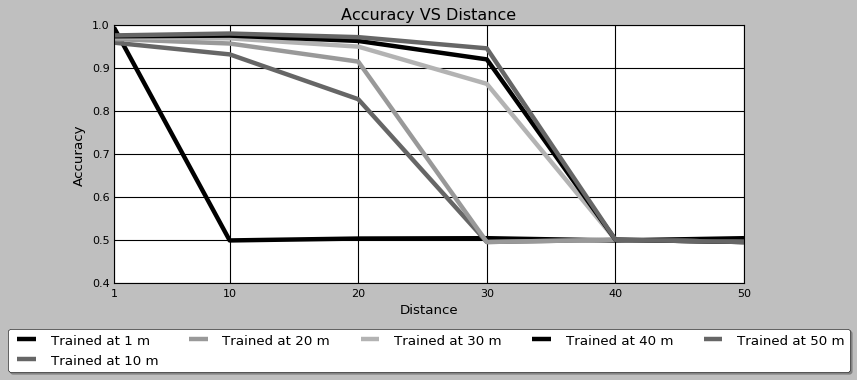

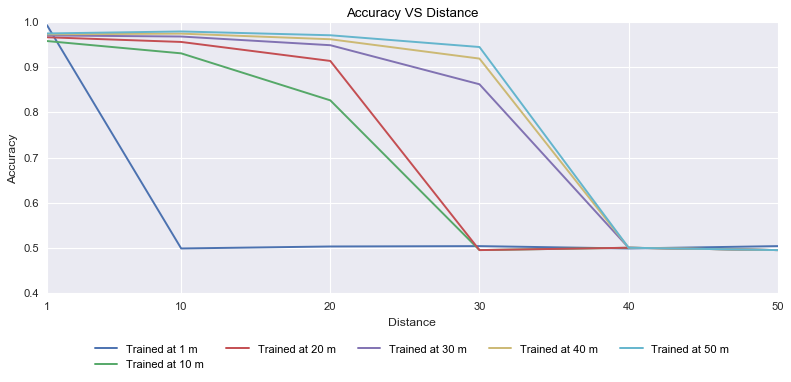

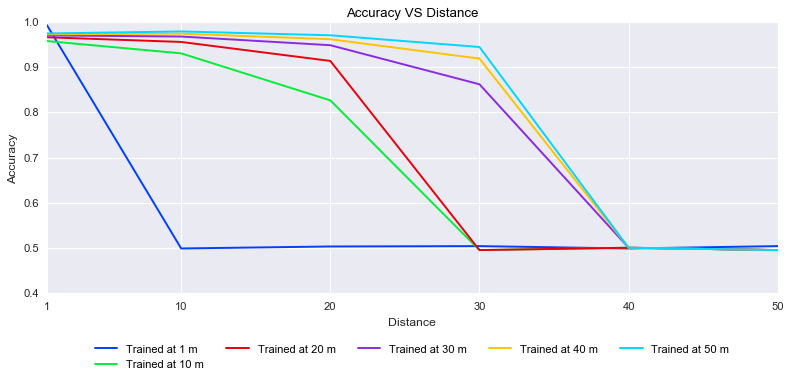

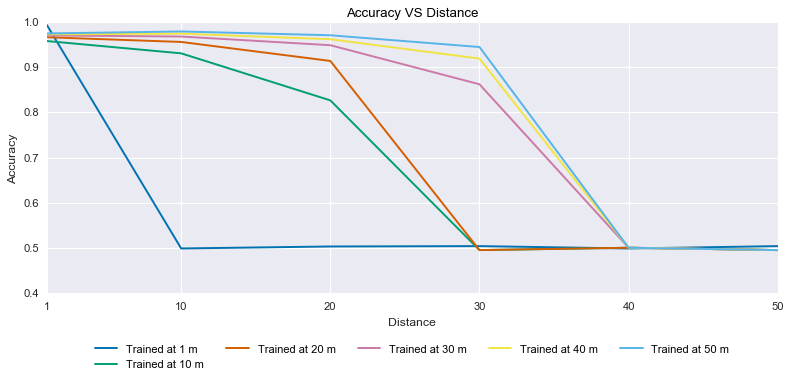

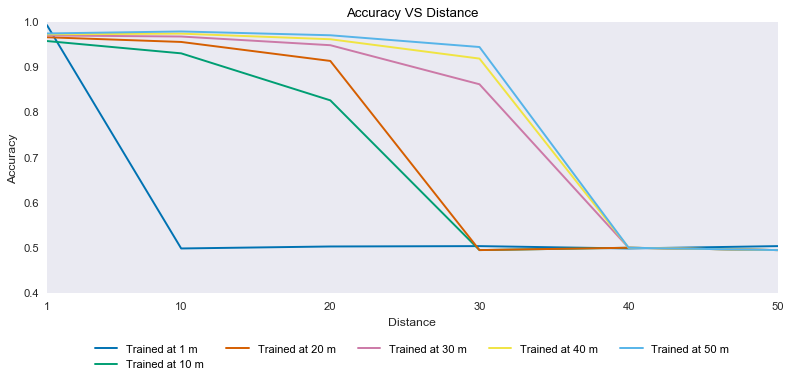

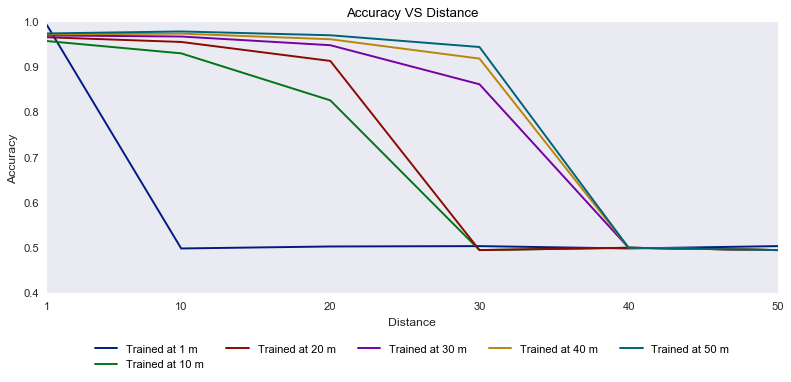

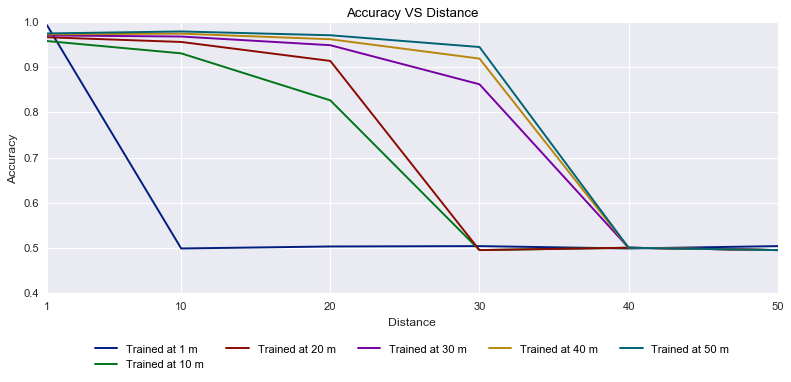

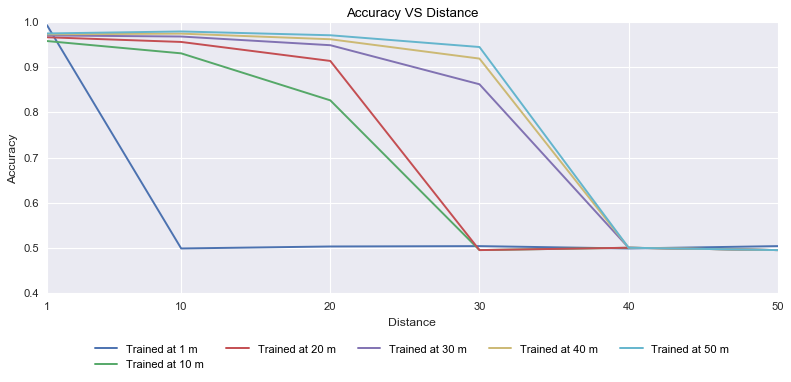

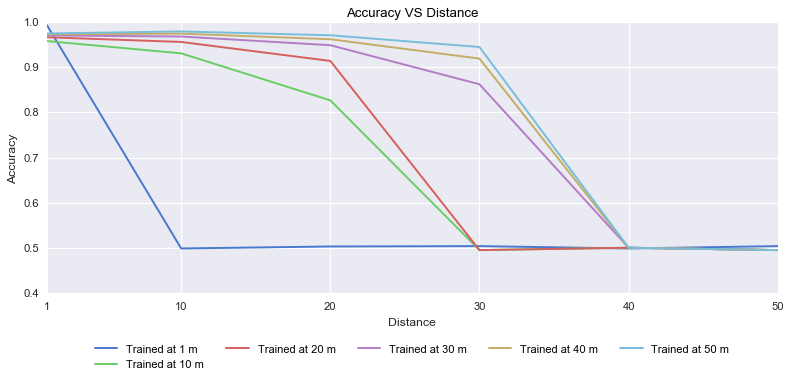

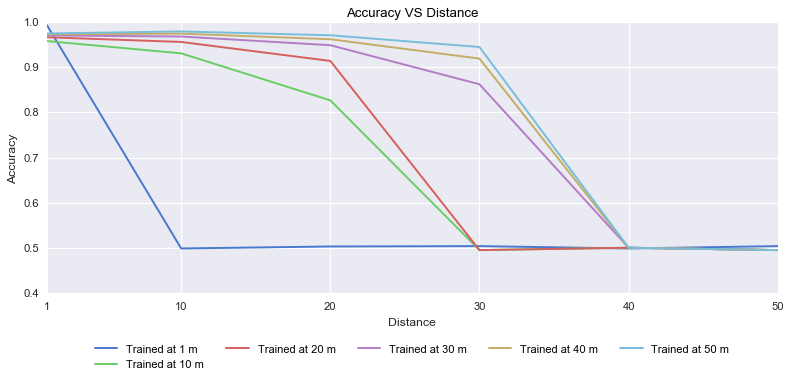

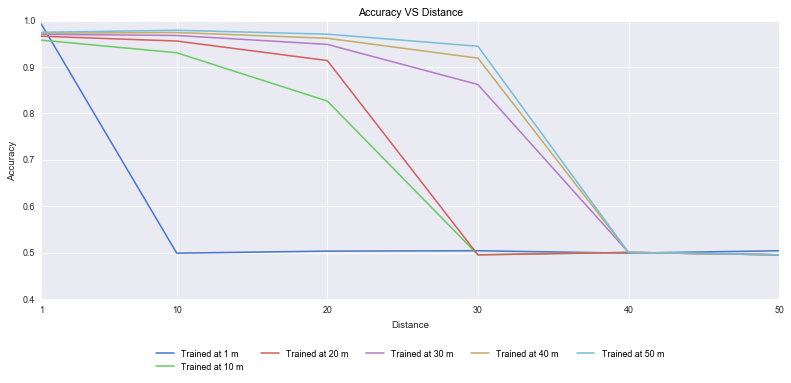

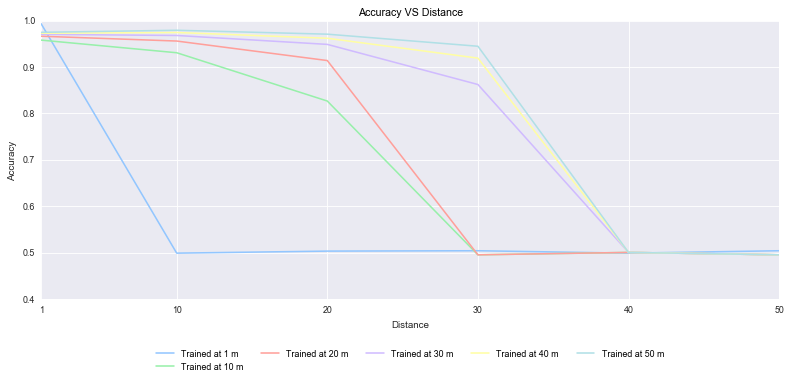

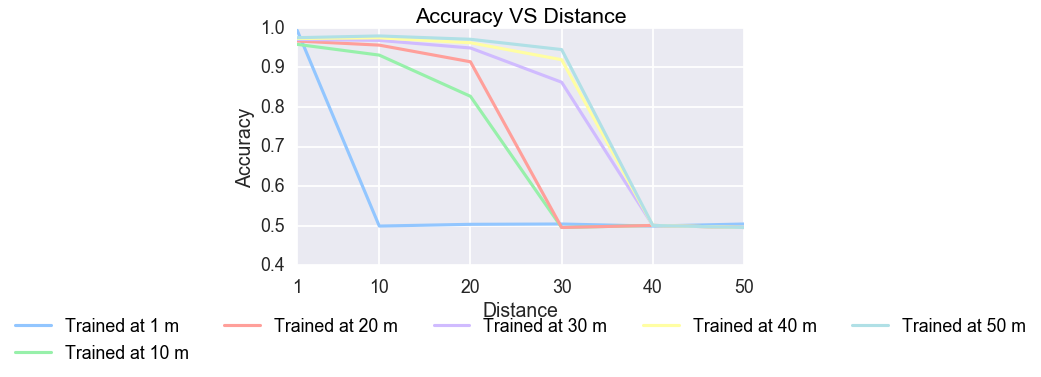

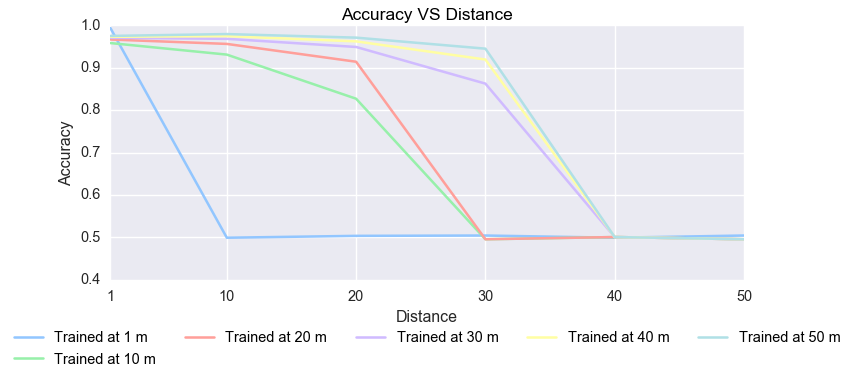

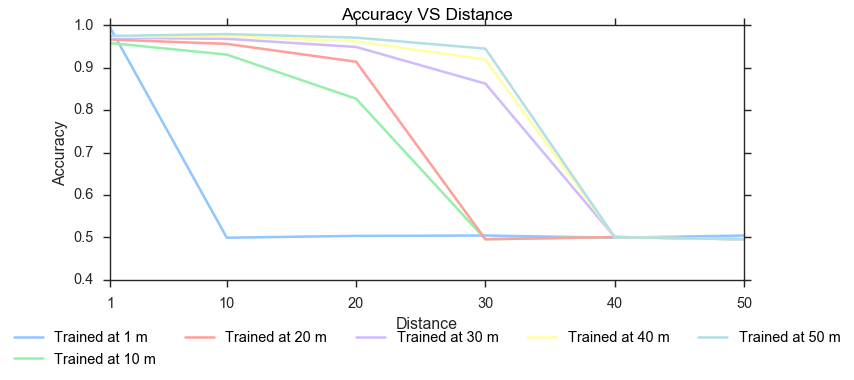

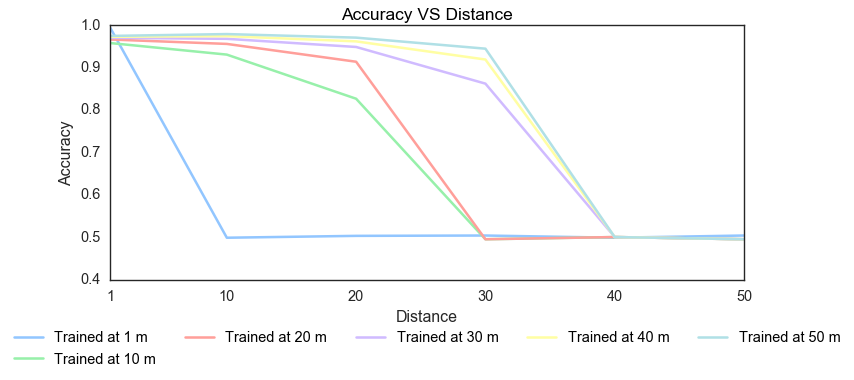

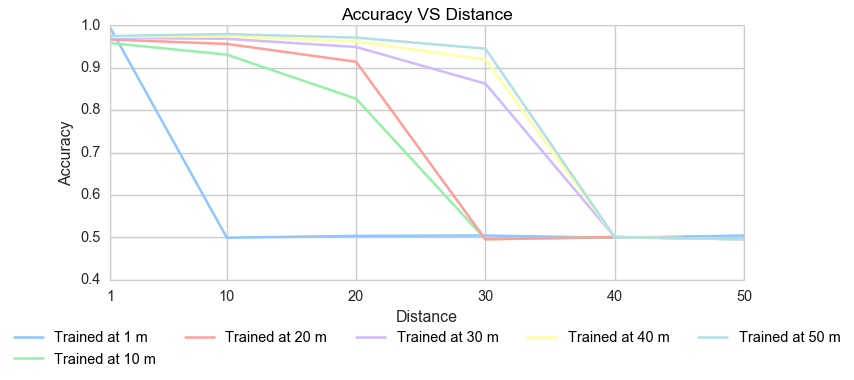

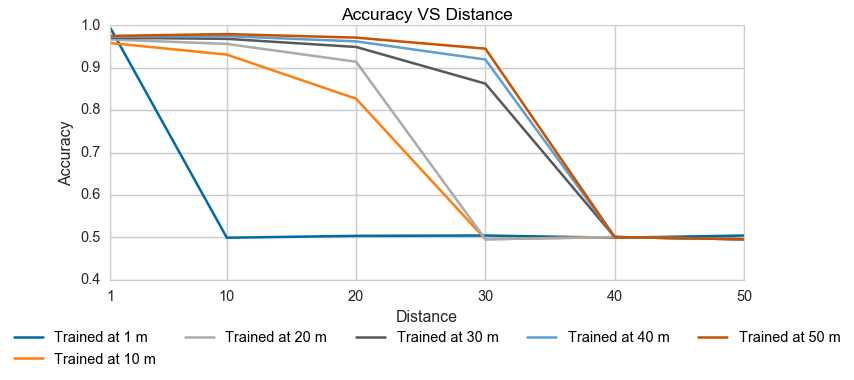

In [30]:
for i in plt.style.available:

    n_curves_per_subplot = 10
    plt.style.use(i)
    n_subplots = (len(RES) + n_curves_per_subplot - 1) // n_curves_per_subplot  
    fig, axes = plt.subplots(nrows=n_subplots, ncols=1, figsize=(10, n_subplots * 5))
    if n_subplots == 1:
        axes = [axes] 

    for j, ax in enumerate(axes):
        start_index = j * n_curves_per_subplot
        end_index = min((j + 1) * n_curves_per_subplot, len(RES))
        for i in range(start_index, end_index):
            ax.plot(ACCORDING_DISTANCES, RES[i], label=f'Trained at {ACCORDING_DISTANCES[i]} m')
        # ax.set_title(f'Subplot {j+1}')
        ax.set_title('Accuracy VS Distance',color='black')
        ax.set_xlabel('Distance')       
        ax.set_ylabel('Accuracy')
        m = ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=5)
        ax.set_xticks(ACCORDING_DISTANCES)
        ax.set_xlim([1, 50])
        for text in m.get_texts():
            text.set_color('black')
    plt.tight_layout()
    plt.show()
